In [0]:
import sys
sys.path.append('/content/drive/My Drive/GAN')

In [0]:
import cv2
import glob
import numpy as np
from PIL import Image
import torch

images = []

files = glob.glob ("/content/drive/My Drive/GAN/images3/*.jpg") # your image path
for myFile in files:
    image = cv2.imread(myFile)
    image = cv2.resize(image,dsize=(224, 224))
    images.append (image)
images = np.array(images,dtype='float32') #as mnist

print(images.shape)
images=torch.from_numpy(images)
print(images.dtype)
print(images.size())

(200, 224, 224, 3)
torch.float32
torch.Size([200, 224, 224, 3])


In [0]:
images=images.permute(0,3,1,2)
print(images.size())
print (images)
images_for_later=y = images.clone().detach()
print(images_for_later.size())
print(images_for_later)

torch.Size([200, 3, 224, 224])
tensor([[[[ 53.,  58.,  78.,  ..., 126.,  78., 102.],
          [ 64.,  72.,  98.,  ..., 103.,  58.,  79.],
          [ 67.,  95., 102.,  ...,  95., 142.,  75.],
          ...,
          [ 84.,  87.,  78.,  ..., 122., 128., 125.],
          [ 85.,  95.,  70.,  ..., 133.,  98., 107.],
          [ 90., 106.,  80.,  ...,  69., 110., 121.]],

         [[ 65.,  68.,  90.,  ..., 186., 154., 170.],
          [ 75.,  83., 111.,  ..., 174., 130., 151.],
          [ 78., 106., 115.,  ..., 136., 177., 132.],
          ...,
          [139., 129., 114.,  ..., 172., 181., 177.],
          [133., 146., 113.,  ..., 191., 160., 165.],
          [137., 149., 125.,  ..., 129., 177., 174.]],

         [[ 76.,  82., 111.,  ..., 160., 111., 125.],
          [ 89., 101., 127.,  ..., 153., 120., 147.],
          [ 94., 126., 126.,  ..., 121., 183., 146.],
          ...,
          [107., 114.,  80.,  ..., 171., 184., 174.],
          [106., 111.,  75.,  ..., 188., 158., 153.],
  

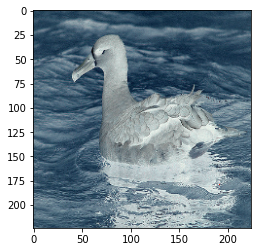

In [0]:
import matplotlib.pyplot as plt
from torchvision import transforms
h=transforms.ToPILImage(mode="RGB")(images[1])
plt.imshow(h)

In [0]:
from torchvision import transforms
transform = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


In [0]:
for i in range(0,15):
  images[i]=transform(images[i])

print(images)

tensor([[[[229.3231, 251.1572, 338.4934,  ..., 548.1004, 338.4934, 443.2969],
          [277.3581, 312.2926, 425.8297,  ..., 447.6638, 251.1572, 342.8603],
          [290.4585, 412.7292, 443.2969,  ..., 412.7292, 617.9694, 325.3930],
          ...,
          [364.6943, 377.7947, 338.4934,  ..., 530.6332, 556.8340, 543.7336],
          [369.0611, 412.7292, 303.5590,  ..., 578.6681, 425.8297, 465.1310],
          [390.8952, 460.7642, 347.2271,  ..., 299.1921, 478.2314, 526.2664]],

         [[288.1429, 301.5357, 399.7500,  ..., 828.3214, 685.4643, 756.8929],
          [332.7857, 368.5000, 493.5000,  ..., 774.7500, 578.3214, 672.0714],
          [346.1786, 471.1786, 511.3571,  ..., 605.1072, 788.1429, 587.2500],
          ...,
          [618.5000, 573.8572, 506.8928,  ..., 765.8214, 806.0000, 788.1429],
          [591.7143, 649.7500, 502.4286,  ..., 850.6429, 712.2500, 734.5714],
          [609.5714, 663.1429, 556.0000,  ..., 573.8572, 788.1429, 774.7500]],

         [[335.9734, 362.6400,

In [0]:
import torch
import torch.nn as nn
from torchvision.models import vgg16_bn
from collections import namedtuple

class Vgg16(torch.nn.Module):
    def __init__(self):
        super(Vgg16, self).__init__()
        model = vgg16_bn(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        features = list(model.features)
        print(*features,sep='\n')
        print(len(features))
        self.features = nn.ModuleList(features).eval() 
        
    def forward(self, x):
        for ii,model in enumerate(self.features):
            x = model(x)
        return x
            

In [0]:
mymodel=Vgg16()

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth



Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
Conv2d(256, 256, 

In [0]:
out=mymodel.forward(images)

In [0]:
print(out.size())

torch.Size([200, 512, 14, 14])


In [0]:
from factor_catalog import FactorCatalog
fc=FactorCatalog(15)
heatmaps = fc.fit_predict(out,raw=True)

In [0]:
y=heatmaps.get(224)
print(y.size())

y=torch.argmax(y,1)
print(y.size())

print (y)

torch.Size([200, 15, 224, 224])
torch.Size([200, 224, 224])
tensor([[[11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         ...,
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4]],

        [[11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         ...,
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4]],

        [[11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         ...,
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4]],

        ...,

        [[11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         [11, 11, 11,  ..., 11, 11, 11],
         ...,
   

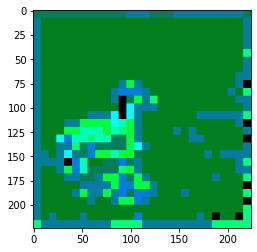

In [0]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(15)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(y[8].byte().cpu().numpy())
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)


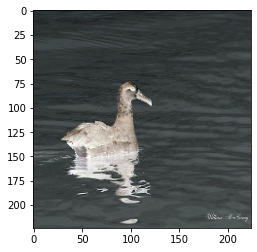

In [0]:
h=transforms.ToPILImage(mode="RGB")(images_for_later[8])
plt.imshow(h)